In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_excel("salary_data_cleaned.xlsx")

In [19]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",38,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,720,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,34,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,875,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",48,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,850,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,38,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,765,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,29,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1145,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [20]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [21]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'


In [22]:
df["job_simp"] = df["Job Title"].apply(title_simplifier)

In [23]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [24]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [25]:
#Fix Los Angeles
df["job_state"] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != "los angeles" else "CA")
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
IN     10
UT     10
AZ      9
MO      9
AL      8
MI      6
GA      6
DE      6
KY      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
SC      1
RI      1
Name: job_state, dtype: int64

In [26]:
## Job description Lenght

df["desc_len"] = df["Job Description"].apply(lambda x: len(x))
df["desc_len"]

0      2548
1      4857
2      3462
3      3883
4      2743
       ... 
737    6162
738    6142
739    3082
740    1642
741    3711
Name: desc_len, Length: 742, dtype: int64

In [27]:
#Niumber of competitors
df["num_comp"] = df["Competitors"].apply(lambda x: len(x.split(",")) if x != "-1" else 0)
df["num_comp"]

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [28]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [29]:
df[df.hourly ==1][["hourly", "min_salary", "max_salary"]]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [30]:
df.company_txt
#we should remove the new line character

0                          Tecolote Research\n
1      University of Maryland Medical System\n
2                                    KnowBe4\n
3                                       PNNL\n
4                         Affinity Solutions\n
                        ...                   
737                                      GSK\n
738                               Eventbrite\n
739           Software Engineering Institute\n
740                             Numeric, LLC\n
741             Riverside Research Institute\n
Name: company_txt, Length: 742, dtype: object

In [31]:
df["company_txt"] = df.company_txt.apply(lambda x: x.replace("\n", ""))
df.company_txt

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [32]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,36.188679,1837.154987,0.032345,0.022911,74.719677,128.149596,1006.260108,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3877.239892,1.053908
std,8.012102,497.183763,0.177034,0.149721,30.980593,45.220324,388.559482,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1525.078365,1.384239
min,-10.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,135.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,33.000000,1939.000000,0.000000,0.000000,52.000000,96.000000,735.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,37.000000,1988.000000,0.000000,0.000000,69.500000,124.000000,975.000000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3739.000000,0.000000
75%,40.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,1225.000000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4746.000000,3.000000
max,50.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,2540.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10059.000000,4.000000


<AxesSubplot:>

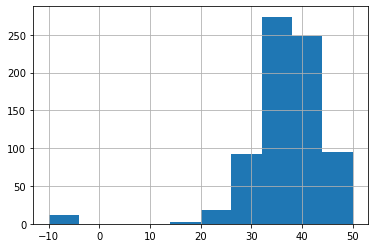

In [35]:
df.Rating.hist()

In [38]:
#plt.hist(x = df["Rating"])

In [39]:
#import seaborn as sns
#sns.histplot(x = df["Rating"])

<AxesSubplot:>

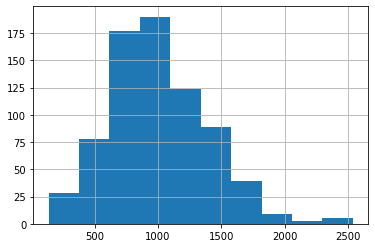

In [40]:
df.avg_salary.hist()

<AxesSubplot:>

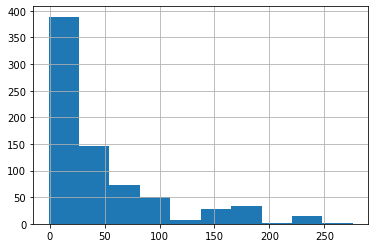

In [41]:
#we might have to normalize the age, if we want to use it in a regression modell, because its not normally distributed

df.age.hist()

<AxesSubplot:>

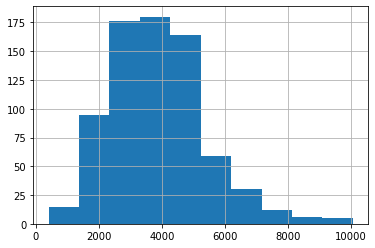

In [42]:
df. desc_len.hist()

<AxesSubplot:>

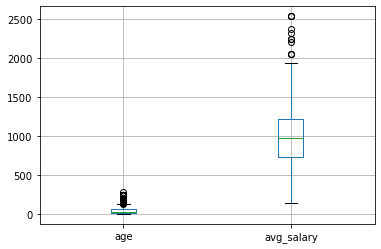

In [44]:
df.boxplot(column = ["age", "avg_salary"])

<AxesSubplot:>

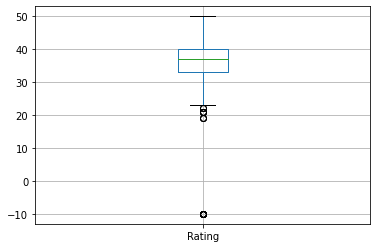

In [45]:
df.boxplot(column = ["Rating"])

In [47]:
df[["age", "avg_salary", "Rating", "desc_len"]].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.163542
avg_salary,0.019655,1.000000,0.013492,0.078875
Rating,0.021655,0.013492,1.000000,-0.012215
desc_len,0.163542,0.078875,-0.012215,1.000000


<AxesSubplot:>

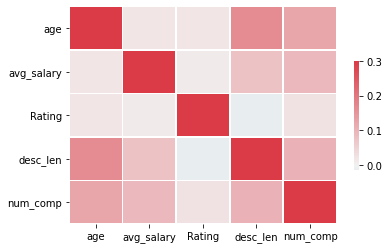

In [62]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df[["age", "avg_salary", "Rating", "desc_len", "num_comp"]].corr(), vmax = .3, cmap = cmap, center = 0,
           linewidths = .8, cbar_kws = {"shrink": .5})

In [63]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [65]:
#look at the categorical variables
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt',
             'job_state','same_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 200


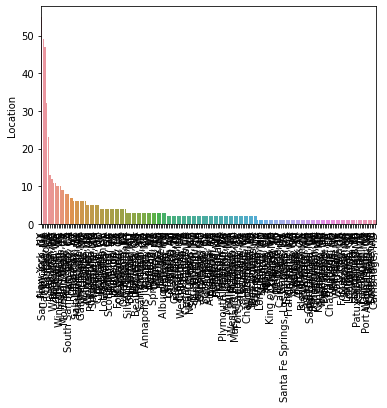

graph for Headquarters: total = 198


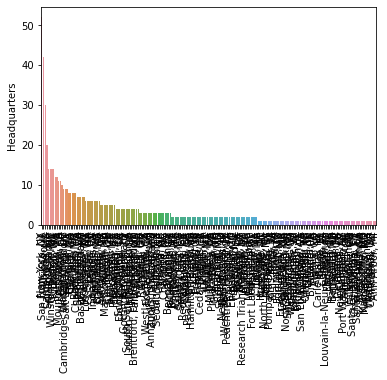

graph for Size: total = 9


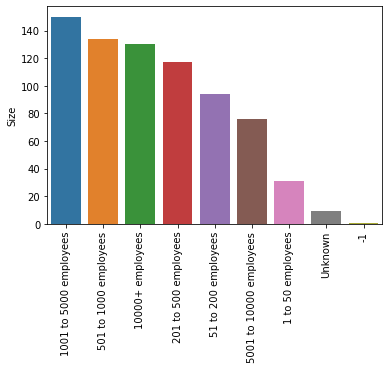

graph for Type of ownership: total = 11


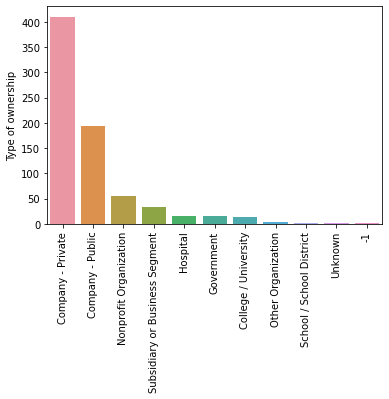

graph for Industry: total = 60


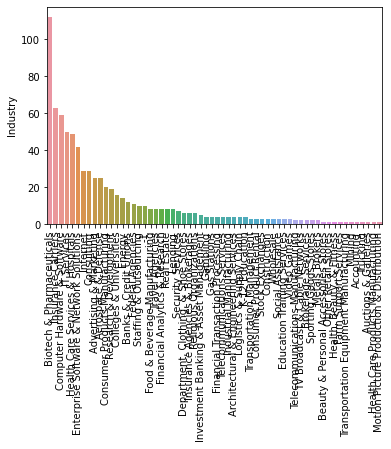

graph for Sector: total = 25


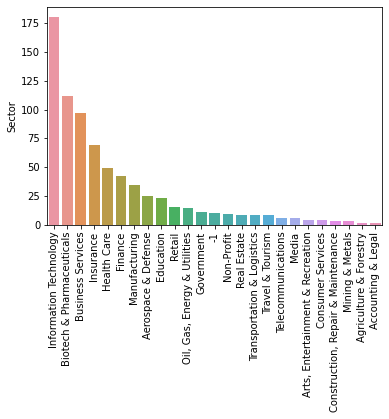

graph for Revenue: total = 14


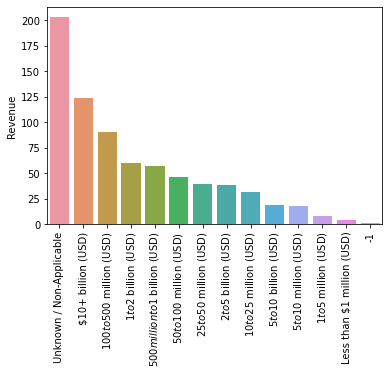

graph for company_txt: total = 343


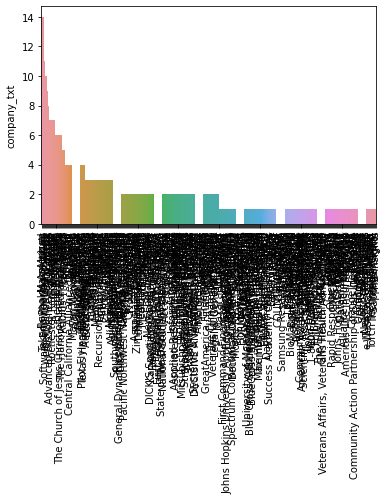

graph for job_state: total = 37


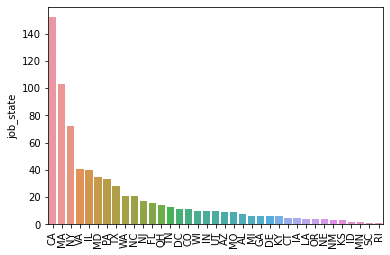

graph for same_state: total = 2


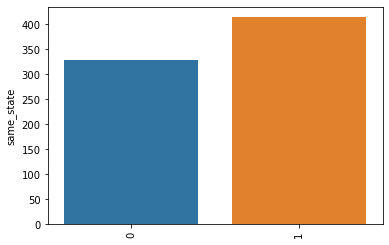

graph for python_yn: total = 2


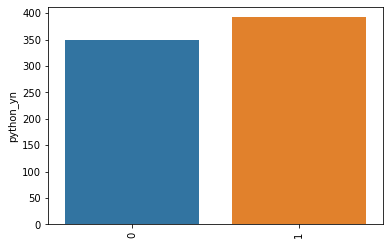

graph for R_yn: total = 2


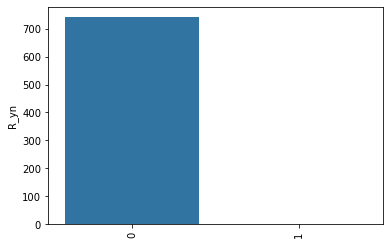

graph for spark: total = 2


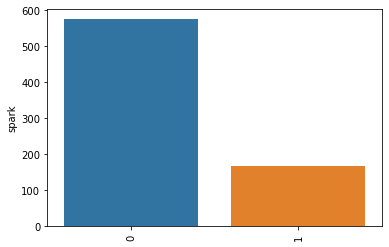

graph for aws: total = 2


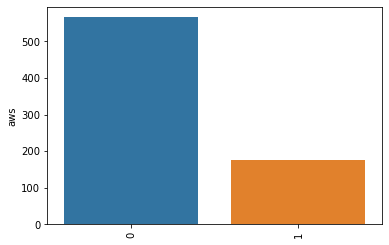

graph for excel: total = 2


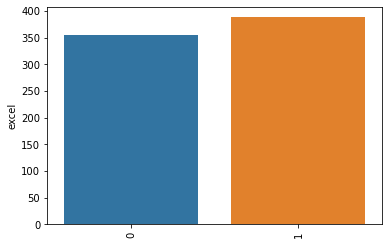

graph for job_simp: total = 7


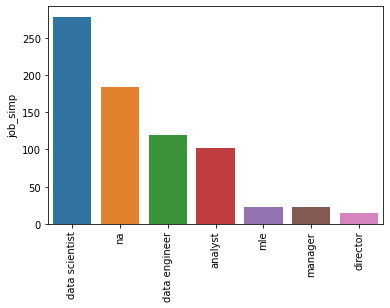

graph for seniority: total = 3


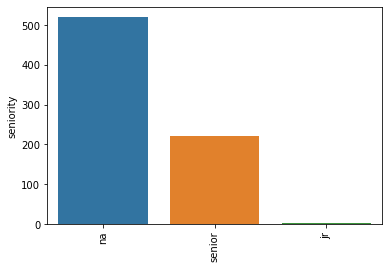

In [66]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


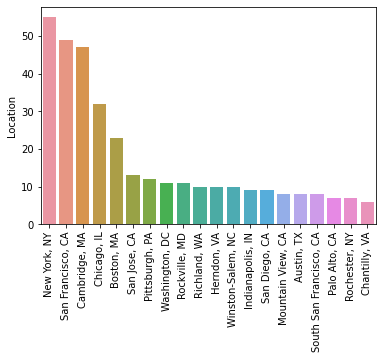

graph for Headquarters: total = 20


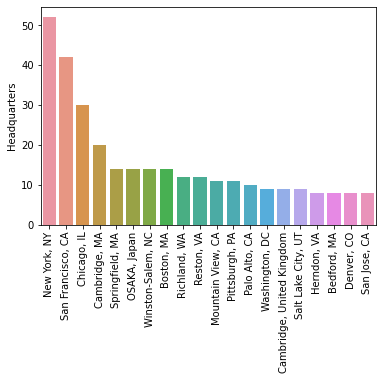

graph for company_txt: total = 20


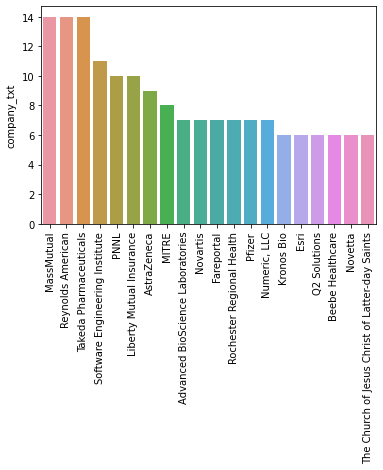

In [68]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20] #take the top 20
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [73]:
pd.pivot_table(df, values = "avg_salary", index = "job_simp").sort_values(by = ["avg_salary"], ascending = False)

,avg_salary
job_simp,
director,1686.071429
mle,1264.318182
data scientist,1175.645161
data engineer,1054.033613
na,848.532609
manager,840.227273
analyst,658.578431


In [74]:
pd.pivot_table(df, values = "avg_salary", index = ["job_simp", "seniority"])

avg_salary
job_simp       seniority             
analyst        jr          565.000000
               na          611.554054
               senior      790.925926
data engineer  na          967.012195
               senior     1246.891892
data scientist jr         1065.000000
               na         1070.430108
               senior     1389.565217
director       na         1686.071429
manager        na          840.227273
mle            na         1191.333333
               senior     1420.714286
na             na          739.881890
               senior     1090.614035

In [77]:
pd.pivot_table(df, values = "avg_salary", index = "job_state").sort_values(by = ["avg_salary"], ascending = False)

,avg_salary
job_state,
CA,1235.131579
IL,1166.625000
DC,1101.818182
MA,1062.815534
NJ,1045.588235
MI,1002.500000
RI,1000.000000
NY,986.527778
NC,984.523810


In [79]:
#Option damit alle angezeigt werden:
pd.options.display.max_rows
pd.set_option("display.max_rows", None)

In [80]:
pd.pivot_table(df, values = "avg_salary", index = ["job_state", "job_simp"], aggfunc = "count").sort_values(by = ["avg_salary"], ascending = False)

avg_salary
job_state job_simp                  
CA        data scientist          68
MA        na                      46
NY        data scientist          40
MA        data scientist          30
CA        na                      27
          data engineer           25
VA        data scientist          18
CA        analyst                 18
WA        data scientist          17
MD        na                      16
IL        data scientist          15
NY        analyst                 14
MD        data scientist          13
TX        data scientist          13
NC        na                      12
MA        data engineer           12
NY        na                      12
VA        data engineer           10
TN        data engineer           10
CA        manager                  9
IL        data engineer            8
TX        data engineer            8
PA        na                       8
          analyst                  8
          mle                      7
TX        na                       7
FL        data scientist           7
OH        data scientist           7
NC        data engineer            6
MA        director                 6
IL        na                       6
          director                 6
NJ        analyst                  6
FL        analyst                  6
DE        na                       6
PA        data scientist           6
VA        analyst                  6
DC        data scientist           5
CA        mle                      5
AZ        data engineer            5
MA        manager                  5
VA        na                       5
AL        analyst                  5
NY        data engineer            4
OH        analyst                  4
NJ        data scientist           4
NE        na                       4
UT        analyst                  4
MI        data scientist           4
MA        analyst                  4
KY        na                       4
DC        data engineer            4
IN        data engineer            4
          na                       4
WI        na                       4
MD        data engineer            3
NM        data scientist           3
IA        data engineer            3
GA        data scientist           3
OH        na                       3
OR        data scientist           3
FL        data engineer            3
PA        manager                  3
CT        na                       3
CO        na                       3
          data scientist           3
          data engineer            3
UT        data engineer            3
          data scientist           3
WA        analyst                  3
WI        analyst                  3
          data scientist           3
IL        analyst                  3
GA        na                       3
MD        analyst                  3
MO        data scientist           3
          na                       3
KS        mle                      3
NC        data scientist           3
TN        analyst                  2
MO        analyst                  2
VA        mle                      2
CT        data scientist           2
NJ        manager                  2
AL        na                       2
DC        analyst                  2
LA        data engineer            2
IN        data scientist           2
KY        data scientist           2
MI        manager                  2
NJ        data engineer            2
IA        analyst                  2
NY        mle                      2
IL        mle                      2
ID        analyst                  2
NJ        director                 2
AZ        na                       2
WA        na                       1
CO        analyst                  1
MN        analyst                  1
AL        data engineer            1
AZ        analyst                  1
          data scientist           1
NJ        na                       1
MN        data engineer            1
MO        manager                  1
CO        mle                 

In [83]:
pd.pivot_table(df[df.job_simp == "data scientist"], values = "avg_salary", index =  "job_state").sort_values(by = ["avg_salary"], ascending = False)

,avg_salary
job_state,
DC,1490.000000
CA,1425.220588
UT,1405.000000
MO,1276.666667
IL,1172.333333
NC,1170.000000
NY,1152.500000
MA,1137.500000
WI,1135.000000


In [85]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [86]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
         avg_salary
Rating             
-10     1361.818182
 50     1347.000000
 25     1200.000000
 45     1177.142857
 41     1163.684211
 39     1130.714286
 26     1090.833333
 44     1086.060606
 32     1055.000000
 40     1053.404255
 35     1048.979592
 37     1041.311475
 47     1039.838710
 43     1024.687500
 33     1018.589744
 42     1004.423077
 22      977.500000
 46      972.500000
 38      968.114754
 21      959.000000
 34      930.113636
 19      875.000000
 31      865.800000
 30      855.882353
 36      854.673913
 28      839.285714
 27      832.500000
 23      815.000000
 29      811.388889
 48      802.777778
 24      602.142857
Industry
                                           avg_salary
Industry                                             
Other Retail Stores                       1635.000000
Motion Picture Production & Distribution  1460.000000
Financial Analytics & Research            1451.250000
Health, Beauty, & Fitness                 1395.000000


ValueError: Grouper for 'avg_salary' not 1-dimensional

In [87]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [89]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [90]:
#Word cloud for job description
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [91]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Besitzer/nltk_data'
    - 'C:\\Users\\Besitzer\\anaconda3\\nltk_data'
    - 'C:\\Users\\Besitzer\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Besitzer\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Besitzer\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
